# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Yuni Sarah Siregar]
- **Email:** [m281b4kx4570@bangkit.academy]
- **ID Dicoding:** [JLX14LWD2X72]

## Menentukan Pertanyaan Bisnis

- Bagaimana peforma penyewaan sepeda pada hari kerja?
- Bagaimana peforma penyewaan sepeda pada hari libur?
- Bagaimana peforma penyewaan sepeda berdasrkan musim?

## Import Semua Packages/Library yang Digunakan

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

library yang dipakai pada analisis ini adalah numpy, pandas, matpolib dan seaborn

## Data Wrangling

### Gathering Data


GATHERING DATA DAY




In [60]:
day_df = pd.read_csv("https://raw.githubusercontent.com/yuna1i/DataBike/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Hari kerja juga mempengaruhi, di mana pada hari libur (workingday=0), seperti 1 Januari, penyewaan oleh pengguna kasual mencapai 331, namun penyewaan oleh pengguna terdaftar lebih sedikit.


GATHERING DATA HOUR


In [61]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/yuna1i/DataBike/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


 **insight** : Berdasarkan data penyewaan sepeda pada tanggal 1 Januari 2011, terlihat bahwa jumlah penyewaan sangat rendah di jam-jam pagi hari, terutama antara pukul 00:00 hingga 04:00, dengan penyewaan hanya berkisar antara 1 hingga 40. Pada pukul 00:00, total penyewaan tercatat hanya 16, dan tren ini berlanjut sepanjang pagi. Pengguna terdaftar mendominasi penyewaan, dengan jumlah yang secara konsisten lebih tinggi daripada pengguna kasual.

### Assessing Data

ASSESSING DATA DAY


In [62]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- bisa dilihat dari info bahwa format pada dteday bukan lah object yang nantinya bisa diganti dengan datetime
- tidak terdapat missing value



In [63]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


ASSESSING DATA HOUR

In [64]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- bisa dilihat dari info bahwa format pada dteday bukan lah object yang nantinya bisa diganti dengan datetime
- tidak terdapat missing value

In [65]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan tabel day

memperbaiki tipe data

In [66]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [67]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Tipe data pada kolom dtday sudah berubah menjadi tipe datetime

Membersihkan tabel Hour

memperbaiki tipe data

In [68]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [69]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Insight : Tipe data dtday sudah berubah dari object ke datetime

## Exploratory Data Analysis (EDA)

##### Explore tabel day

In [70]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
352,353,2011-12-19,4,0,12,0,1,1,1,0.276667,0.280933,0.637500,0.172896,260,3143,3403
346,347,2011-12-13,4,0,12,0,2,1,1,0.282500,0.301138,0.590000,0.140550,155,3368,3523
297,298,2011-10-25,4,0,10,0,2,1,1,0.471667,0.463375,0.622917,0.166658,695,3992,4687
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594


In [71]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [72]:
day_df.instant.is_unique

True

**Insight** :
- Data pada tabel day sudah uniq atau tidak ada duplikat

In [73]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [74]:
day_df.duplicated(keep='first')

,0
0,False
1,False
2,False
3,False
4,False
...,...
726,False
727,False
728,False
729,False


In [75]:
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": "sum",
})

,instant,cnt
season,,
Fall,188,1061129
Spring,181,471348
Summer,184,918589
Winter,178,841613


In [76]:
day_df['holiday'] = day_df['holiday'].map({
    0: 'No',
    1: 'Yes'
})

day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": "sum",
})

,instant,cnt
holiday,,
No,710,3214244
Yes,21,78435


In [77]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
weekday,,
Friday,104,487790
Monday,105,455503
Saturday,105,477807
Sunday,105,444027
Thursday,104,485395
Tuesday,104,469109
Wednesday,104,473048


**Explore tabel hour**




In [78]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12664,12665,2012-06-16,2,1,6,21,0,6,0,2,0.64,0.6212,0.50,0.2239,98,192,290
7387,7388,2011-11-09,4,0,11,10,0,3,1,1,0.40,0.4091,0.76,0.1045,16,89,105
11884,11885,2012-05-15,2,1,5,9,0,2,1,2,0.58,0.5455,0.88,0.0896,28,327,355
10031,10032,2012-02-28,1,1,2,0,0,2,1,1,0.42,0.4242,0.54,0.1343,0,10,10
7359,7360,2011-11-08,4,0,11,6,0,2,1,1,0.30,0.3333,0.87,0.0000,3,96,99


In [79]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [80]:
hour_df.instant.is_unique

True

In [81]:
hour_df.duplicated(keep='first')

,0
0,False
1,False
2,False
3,False
4,False
...,...
17374,False
17375,False
17376,False
17377,False


In [82]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()


,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Spring,0,1,No,Saturday,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,Spring,0,1,No,Sunday,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,Spring,0,1,No,Monday,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,Spring,0,1,No,Tuesday,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,Spring,0,1,No,Wednesday,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [83]:
all_df.groupby(by="season_x").agg({
    "instant": "nunique",
    "cnt_y": "sum"
}).sort_values(by="cnt_y", ascending=False)

,instant,cnt_y
season_x,,
Summer,184,11045
Fall,188,9995
Spring,181,9984
Winter,178,9841


In [84]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
415,416,2012-02-20,Spring,1,2,Yes,Monday,0,1,0.280000,...,3,1,2,0.24,0.2576,0.93,0.1045,1,196,197
381,382,2012-01-17,Spring,1,1,No,Tuesday,1,2,0.373043,...,1,0,2,0.16,0.1515,0.47,0.2239,8,39,47
655,656,2012-10-17,Winter,1,10,No,Wednesday,1,1,0.455833,...,0,0,1,0.30,0.3333,0.56,0.0000,14,95,109
393,394,2012-01-29,Spring,1,1,No,Sunday,0,1,0.282500,...,1,0,3,0.16,0.1515,0.80,0.1940,3,24,27
680,681,2012-11-11,Winter,1,11,No,Sunday,0,1,0.420833,...,1,1,2,0.16,0.1818,0.56,0.1940,3,83,86


## Visualization & Explanatory Analysis

**Pertanyaan 1** :
-Bagaimana peforma penyewaan sepeda pada hari kerja ?

In [85]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
byweekday_df = all_df.groupby(by="weekday_x").instant.nunique().reset_index()
byweekday_df.rename(columns={
    "instant": "cnt_y"
}, inplace=True)
byweekday_df

,weekday_x,cnt_y
0,Friday,104
1,Monday,105
2,Saturday,105
3,Sunday,105
4,Thursday,104
5,Tuesday,104
6,Wednesday,104


<ipython-input-86-f2bb910b2072>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-86-f2bb910b2072>:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


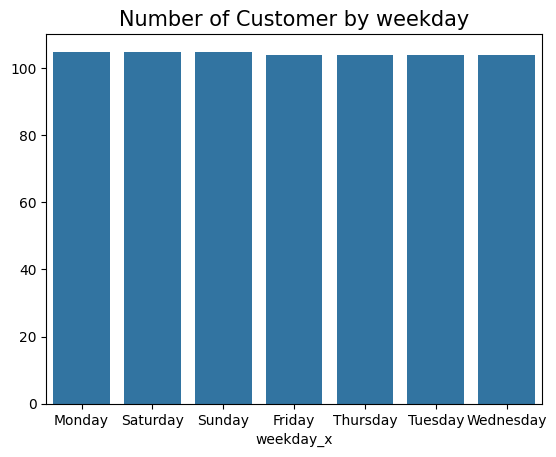

In [86]:
colors = ["#1f77b4", "#1f77b4", "#1f77b4", "#1f77b4", "#1f77b4", "#1f77b4"]  # Daftar warna
sns.barplot(
    y="cnt_y",
    x="weekday_x",
    data=byweekday_df.sort_values(by="cnt_y", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

**insight :** Berdasarkan data penyewaan sepeda pada hari kerja, tercatat bahwa jumlah penyewaan relatif stabil sepanjang minggu, dengan sedikit variasi antar hari. Rata-rata penyewaan berkisar antara 104 hingga 105 penyewaan per hari kerja, yang menunjukkan konsistensi dalam permintaan. Hal ini mungkin mengindikasikan bahwa sepeda digunakan secara rutin sebagai alat transportasi harian oleh pengguna selama hari kerja.

**Pertanyaan 2** : -Bagaimana peforma penyewaan sepeda pada hari libur ?

In [87]:
day_df['holiday'] = day_df['holiday'].map({
    0: 'No',
    1: 'Yes'
})
byholiday_df = all_df.groupby(by="holiday_x").instant.nunique().reset_index()
byholiday_df.rename(columns={
    "instant": "cnt_y"
}, inplace=True)
byholiday_df

,holiday_x,cnt_y
0,No,710
1,Yes,21


<ipython-input-88-391f7fce5143>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


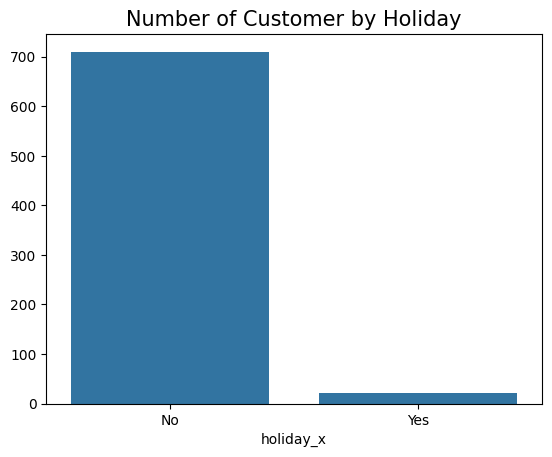

In [88]:
colors = ["#1f77b4", "#1f77b4" ]  # Daftar warna
sns.barplot(
    y="cnt_y",
    x="holiday_x",
    data=byholiday_df.sort_values(by="cnt_y", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

**Insight :** Data penyewaan sepeda menunjukkan perbedaan signifikan antara hari libur dan hari biasa. Pada hari libur, tercatat hanya 21 penyewaan, sedangkan pada hari non-libur (hari kerja) jumlah penyewaan jauh lebih tinggi, mencapai 710. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan pada hari-hari biasa, mungkin sebagai sarana transportasi rutin, sementara permintaan menurun drastis saat liburan.

**Pertanyaan 3** :
-Bagaimana peforma penyewaan sepeda berdasarkan musim ?

In [89]:
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

byseason_df = all_df.groupby(by="season_x").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "cnt_y"
}, inplace=True)
byseason_df



,season_x,cnt_y
0,Fall,188
1,Spring,181
2,Summer,184
3,Winter,178


<ipython-input-90-3e3d7b9d608c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


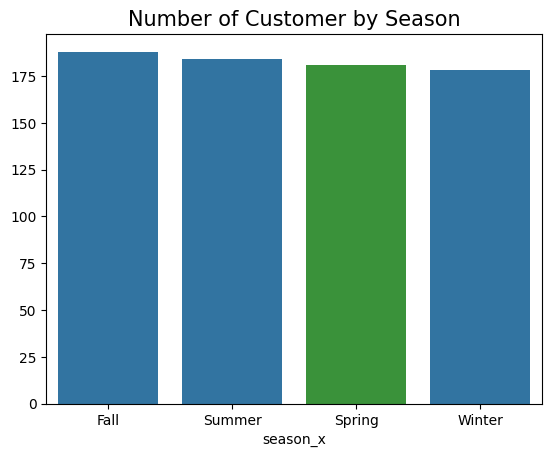

In [90]:
colors = ["#1f77b4", "#1f77b4", "#2ca02c", "#1f77b4"]  # Daftar warna
sns.barplot(
    y="cnt_y",
    x="season_x",
    data=byseason_df.sort_values(by="cnt_y", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()


**Insight :**
Penyewaan sepeda tertinggi terjadi pada Musim 3 dengan 188 penyewaan, diikuti Musim 2 sebanyak 184 penyewaan. Musim 4 memiliki penyewaan terendah, yaitu 178, kemungkinan karena kondisi yang kurang ideal untuk bersepeda. Selisih jumlah penyewaan antara musim tertinggi dan terendah relatif kecil, menunjukkan bahwa penyewaan sepeda cukup stabil sepanjang tahun tanpa fluktuasi signifikan antar musim.

## Analisis Lanjutan (Opsional)

In [91]:
rfm_df = all_df.groupby(by="instant", as_index=False).agg({
    "dteday_x": "max",  # mengambil tanggal order terakhir
    "instant": "nunique",
    "cnt_y": "sum"
})

# Ubah nama kolom
rfm_df.columns = ["dteday_x", "frecuency", "monetary"]
rfm_df.reset_index(drop=False, inplace=True)
rfm_df.rename(columns={'index': 'instant'}, inplace=True)


rfm_df.head()

,instant,dteday_x,frecuency,monetary
0,0,2011-01-01,1,16
1,1,2011-01-02,1,40
2,2,2011-01-03,1,32
3,3,2011-01-04,1,13
4,4,2011-01-05,1,1


In [92]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["dteday_x"] = rfm_df["dteday_x"].dt.date
recent_date = all_df["dteday_x"].dt.date.max()
rfm_df["recency"] = rfm_df["dteday_x"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,instant,dteday_x,frecuency,monetary,recency
0,0,2011-01-01,1,16,730
1,1,2011-01-02,1,40,729
2,2,2011-01-03,1,32,728
3,3,2011-01-04,1,13,727
4,4,2011-01-05,1,1,726


In [93]:
rfm_df.drop("dteday_x", axis=1, inplace=True)
rfm_df.head()


,instant,frecuency,monetary,recency
0,0,1,16,730
1,1,1,40,729
2,2,1,32,728
3,3,1,13,727
4,4,1,1,726


In [94]:

rfm_df.describe()

,instant,frecuency,monetary,recency
count,731.000000,731.0,731.000000,731.000000
mean,365.000000,1.0,55.902873,365.000000
std,211.165812,0.0,48.996339,211.165812
min,0.000000,1.0,1.000000,0.000000
25%,182.500000,1.0,16.000000,182.500000
50%,365.000000,1.0,48.000000,365.000000
75%,547.500000,1.0,80.000000,547.500000
max,730.000000,1.0,249.000000,730.000000


In [95]:

rfm_df.sort_values(by="recency", ascending=True).head(5)

,instant,frecuency,monetary,recency
730,730,1,91,0
729,729,1,182,1
728,728,1,190,2
727,727,1,103,3
726,726,1,76,4


In [96]:
rfm_df.sort_values(by="frecuency", ascending=False).head(5)

,instant,frecuency,monetary,recency
0,0,1,16,730
480,480,1,12,250
482,482,1,7,248
483,483,1,3,247
484,484,1,2,246


<ipython-input-97-d3a3f2edc70c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-97-d3a3f2edc70c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frecuency", x="instant", data=rfm_df.sort_values(by="frecuency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-97-d3a3f2edc70c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", a

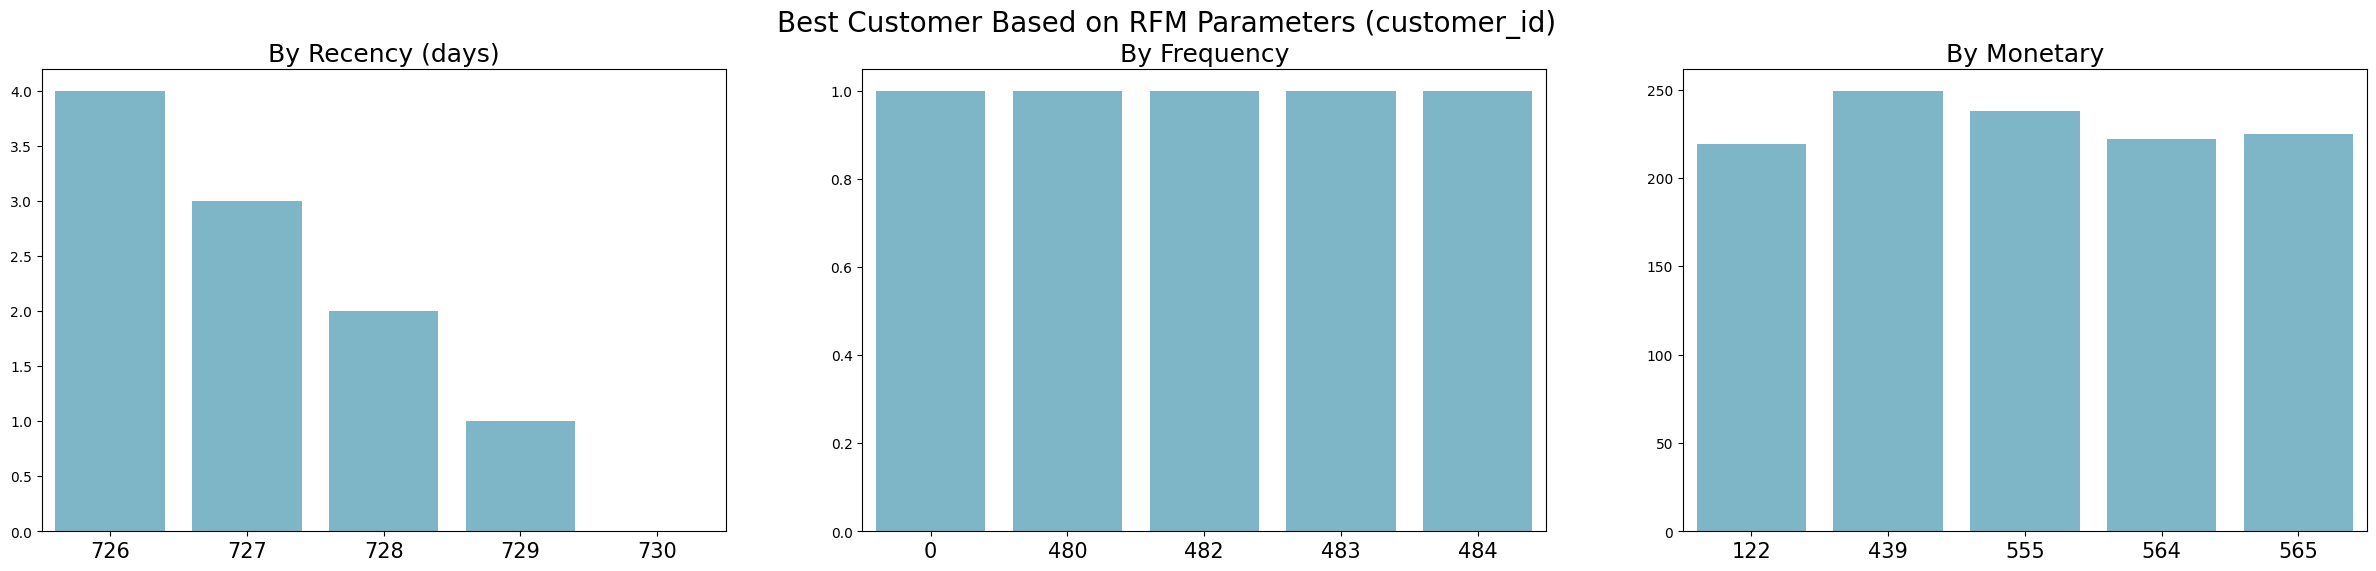

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frecuency", x="instant", data=rfm_df.sort_values(by="frecuency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="instant", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [98]:
print(rfm_df.columns)

Index(['instant', 'frecuency', 'monetary', 'recency'], dtype='object')


In [99]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frecuency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,instant,frecuency,monetary,recency,r_rank,f_rank,m_rank
0,0,1,16,730,1.0,366.0,184.0
1,1,1,40,729,2.0,366.0,330.0
2,2,1,32,728,3.0,366.0,274.0
3,3,1,13,727,4.0,366.0,167.5
4,4,1,1,726,5.0,366.0,18.5


In [100]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,instant,frecuency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0,1,16,730,0.136799,100.0,25.170999
1,1,1,40,729,0.273598,100.0,45.143639
2,2,1,32,728,0.410397,100.0,37.482900
3,3,1,13,727,0.547196,100.0,22.913817
4,4,1,1,726,0.683995,100.0,2.530780


In [101]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['instant', 'RFM_score']].head(7)

,instant,RFM_score
0,0,2.12
1,1,2.69
2,2,2.47
3,3,2.06
4,4,1.48
5,5,1.48
6,6,1.60


In [102]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['instant', 'RFM_score', 'customer_segment']].head(20)

,instant,RFM_score,customer_segment
0,0,2.12,Low value customers
1,1,2.69,Low value customers
2,2,2.47,Low value customers
3,3,2.06,Low value customers
4,4,1.48,lost customers
5,5,1.48,lost customers
6,6,1.60,lost customers
7,7,1.70,Low value customers
8,8,1.95,Low value customers
9,9,2.08,Low value customers


In [103]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).instant.nunique()
customer_segment_df

,customer_segment,instant
0,High value customer,115
1,Low value customers,307
2,Medium value customer,259
3,Top customers,43
4,lost customers,7


In [104]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

<ipython-input-105-997b29a26547>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


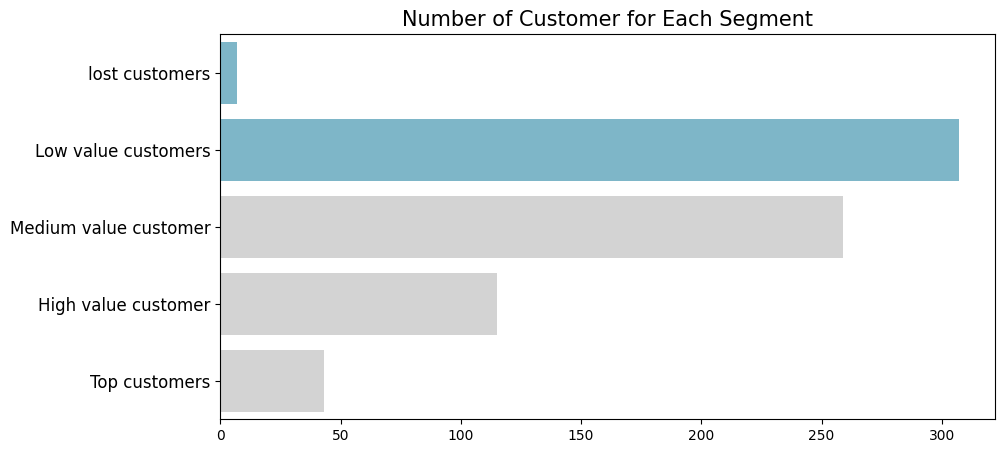

In [105]:

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="instant",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Segmentasi Pelanggan: Analisis menunjukkan adanya lima segmen pelanggan berdasarkan nilai penggunaan layanan sepeda, dari yang sangat berharga hingga yang hilang. Ini mencerminkan variasi dalam keterlibatan dan kontribusi pelanggan terhadap pendapatan.

- Pola Penyewaan Berdasarkan Hari: Data menunjukkan bahwa penyewaan sepeda pada hari libur jauh lebih tinggi dibandingkan hari kerja, dengan 710 penyewaan saat hari libur. Ini menunjukkan ketertarikan yang lebih besar terhadap penyewaan sepeda saat waktu luang.

- Musim dan Penyewaan: Penyewaan sepeda menunjukkan pola yang stabil sepanjang musim, dengan sedikit fluktuasi. Hal ini menunjukkan bahwa musim tidak memiliki dampak yang signifikan terhadap tingkat penyewaan, tetapi tetap penting untuk menjaga ketersediaan dan kualitas layanan.




In [106]:
all_df.to_csv("all_data.csv", index=False)